# Movie Correlation
In this Project we look at what variables effect the gross revenue from movies. In other words, finding what feature correlates with the gross revenue.

In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# read in the csv file

df = pd.read_csv('movies.csv')

In [2]:
# quick look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

In [3]:
# checking to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


There are many way to approach missing values, such as imputation. However, for the purpose of this project, I will be dropping them.

In [4]:
# dropping rows with missing values

df_cleaned = df.dropna()

In [5]:
# datatypes of the columns

df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# change data type of columns

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')

In [7]:
# correct Year column 
# the 'released' column and 'year' column has different year

df_cleaned['year'] = df_cleaned['released'].str.split(',').str[1].str[1:5]

In [8]:
# drop any duplicates

df_cleaned = df_cleaned.drop_duplicates()

## Finding Correlations in Data

**My intuition tell me that budget would effect the gross revenue so let us take a look at that first.**

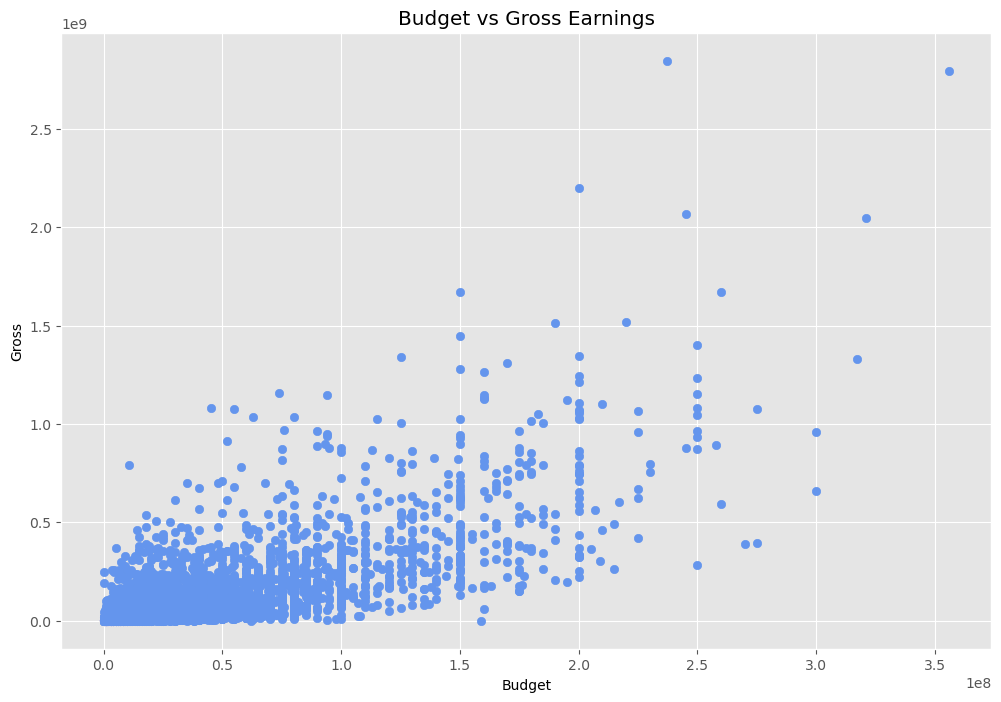

In [9]:
# scatter plot: gross vs budget

plt.scatter(x=df_cleaned['budget'], y=df_cleaned['gross'], color="CornflowerBlue")

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

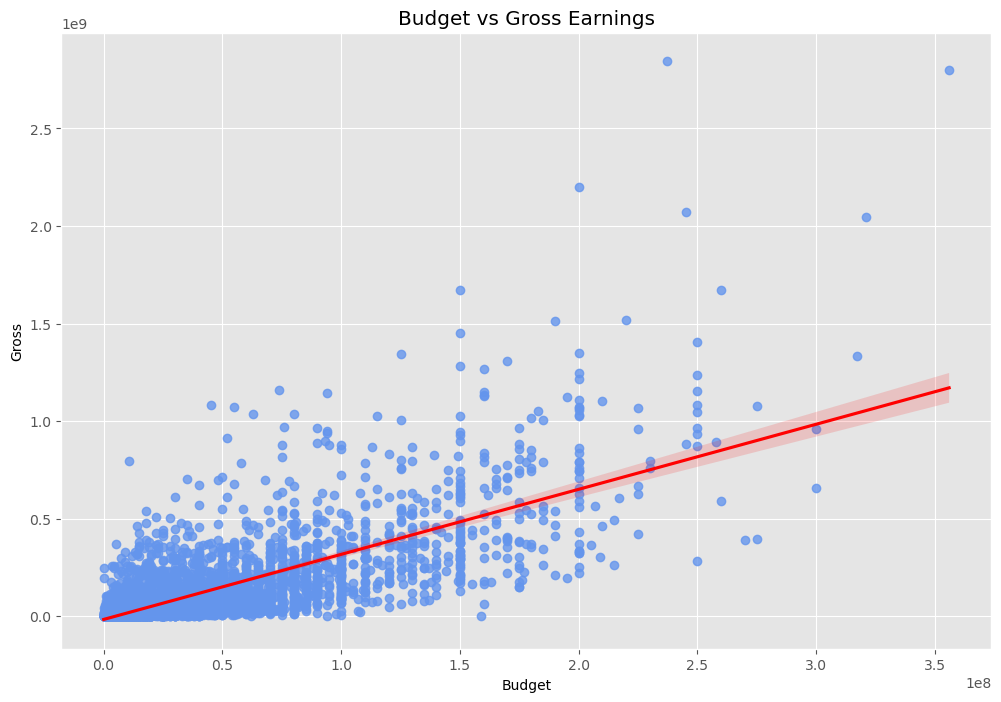

In [10]:
# plot gross vs budget Linear Regression Model Fit using seaborn

sns.regplot(x='budget', y='gross', 
            data=df_cleaned, scatter_kws={"color": "CornflowerBlue",}, 
            line_kws={"color": "red",})

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

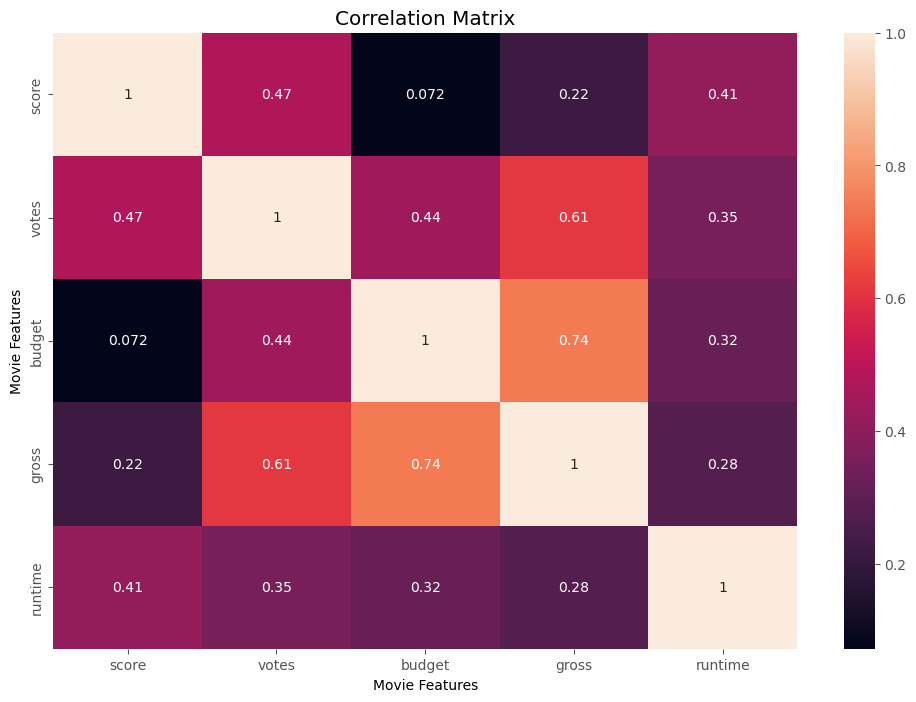

In [11]:
# correlation heatmap

df_corr = df_cleaned.corr(method = 'pearson', numeric_only = True)
sns.heatmap(df_corr, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

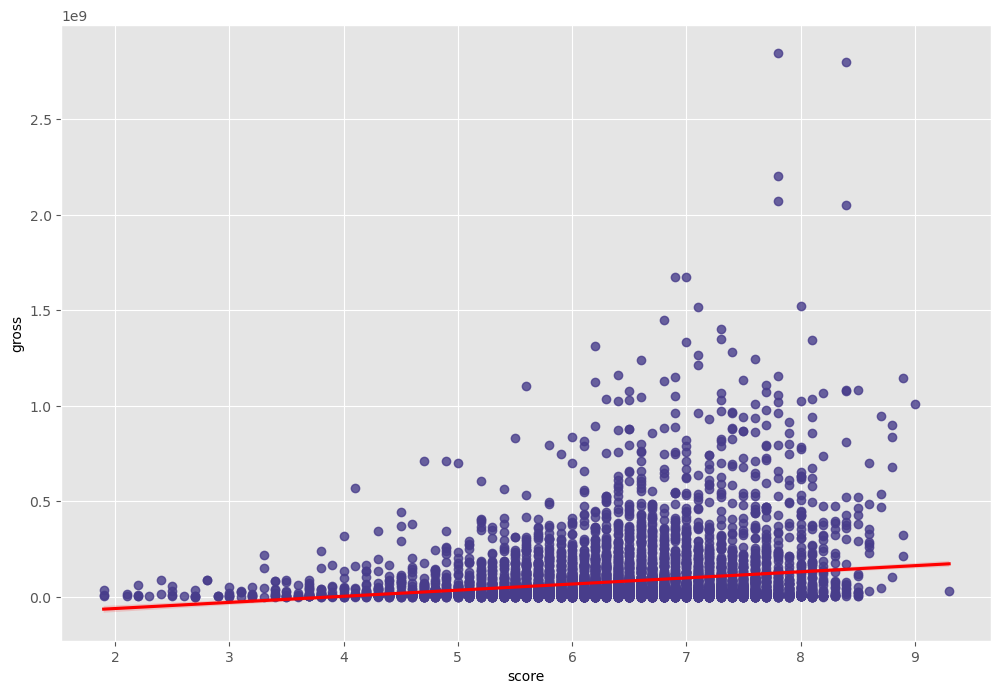

In [12]:
sns.regplot(x="score", y="gross", data=df, color="DarkSlateBlue", line_kws={"color": "red"});

In [13]:
# take a look at company column

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
# copy cleaned dataframe

df_numerized = df_cleaned.copy()


# categorical variables assigned numeric indices

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].astype('category').cat.codes

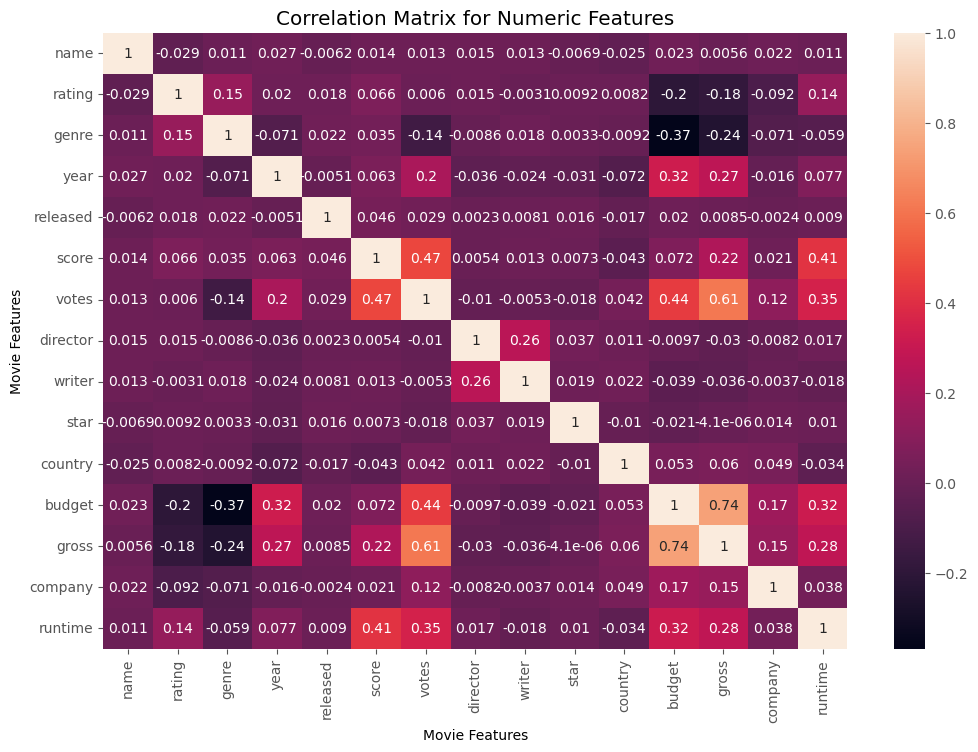

In [15]:
# correlation heatmap

df_corr2 = df_numerized.corr(method = 'pearson')
sns.heatmap(df_corr2, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

### Let's see what feature has is highly correlated with 'gross'

In [16]:
# pivots a level of index levels

corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()


# list of correlation with 'gross' sorted in ascending order

sorted_pairs = corr_pairs['gross'].sort_values(ascending=False)
sorted_pairs

gross       1.000000
budget      0.740247
votes       0.614751
runtime     0.275796
year        0.269479
score       0.222556
company     0.149553
country     0.060078
released    0.008501
name        0.005639
star       -0.000004
director   -0.029560
writer     -0.035885
rating     -0.181906
genre      -0.244101
dtype: float64

**Based on list of correlation pairs, 'budget' and 'vote' seems to have the highest correlation with 'gross' with 0.74 and 0.61 respectively.**